In [ ]:

import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print("Python:", sys.version)
print("TensorFlow:", tf.__version__)

#Use an inbuilt in dataset from tensorflow
from tensorflow.keras.datasets import mnist 
#Define neural network layer by layer
from tensorflow.keras.models import Sequential, load_model
#building blocks of neural network
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import os

Python: 3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 12:58:53) [MSC v.1929 64 bit (AMD64)]
TensorFlow: 2.20.0


In [ ]:
#Spliiting the dataset into train set and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shapes of datasets:")
print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test: ", x_test.shape, "y_test: ", y_test.shape)

Shapes of datasets:
x_train: (60000, 28, 28) y_train: (60000,)
x_test:  (10000, 28, 28) y_test:  (10000,)


In [ ]:
#Preprocessing the data
#Normalizing the pixel values to be between 0 and 1
#Neural networks learn faster and more accurately when inputs are small

X_train = x_train.astype('float32') / 255.0
X_test  = x_test.astype('float32')  / 255.0

In [9]:
print("After normalization:")
print("X_train min/max:", x_train.min(), x_train.max())
print("X_test  min/max:", x_test.min(), x_test.max())


After normalization:
X_train min/max: 0 255
X_test  min/max: 0 255


In [10]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)
print("y_train_cat shape:", y_train_cat.shape, "y_test_cat shape:", y_test_cat.shape)

y_train_cat shape: (60000, 10) y_test_cat shape: (10000, 10)


In [11]:
print("Final dataset shapes:")
print("X_train:", x_train.shape)
print("y_train_cat:", y_train_cat.shape)
print("X_test:", x_test.shape)
print("y_test_cat:", y_test_cat.shape)


Final dataset shapes:
X_train: (60000, 28, 28)
y_train_cat: (60000, 10)
X_test: (10000, 28, 28)
y_test_cat: (10000, 10)


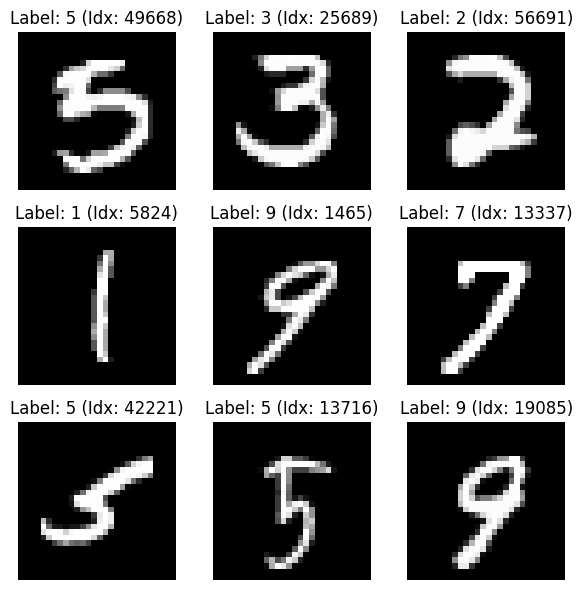

In [36]:

# Randomly select and visualize 9 images from the training set.
# This helps confirm that the dataset loaded correctly and that
# each image matches its corresponding label. The images are
# displayed in a 3x3 grid using matplotlib for quick inspection.
import random
indices = random.sample(range(x_train.shape[0]), 9)
plt.figure(figsize=(6,6))
for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]} (Idx: {idx})")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#BUILD THE MODEL
#

from tensorflow.keras import Sequential, Input
model = Sequential([
    Input(shape=(28, 28)),#Convert 2D 28x28 images to 1D array of 784 pixels 
    Flatten(),
    Dense(128, activation='relu'),# First hidden layer with 128 neurons and ReLU activation
    Dropout(0.3),
    Dense(64, activation='relu'),# Second hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')# Output layer with 10 neurons (one for each digit) and softmax activation
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#TRAIN THE MODEL
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


Epoch 1/10
422/422 - 6s - 14ms/step - accuracy: 0.8475 - loss: 6.7158 - val_accuracy: 0.8745 - val_loss: 0.6957
Epoch 2/10
422/422 - 3s - 6ms/step - accuracy: 0.8050 - loss: 1.1904 - val_accuracy: 0.9072 - val_loss: 0.5330
Epoch 3/10
422/422 - 4s - 11ms/step - accuracy: 0.8336 - loss: 0.8972 - val_accuracy: 0.9243 - val_loss: 0.4542
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.8476 - loss: 0.7152 - val_accuracy: 0.9307 - val_loss: 0.4066
Epoch 5/10
422/422 - 3s - 8ms/step - accuracy: 0.8636 - loss: 0.6381 - val_accuracy: 0.9328 - val_loss: 0.4209
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.8692 - loss: 0.5618 - val_accuracy: 0.9382 - val_loss: 0.3906
Epoch 7/10
422/422 - 2s - 6ms/step - accuracy: 0.8842 - loss: 0.4804 - val_accuracy: 0.9482 - val_loss: 0.3660
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.8916 - loss: 0.4650 - val_accuracy: 0.9468 - val_loss: 0.3371
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.8983 - loss: 0.3985 - val_accuracy: 0.9528 - val_loss: 0.3228

In [17]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

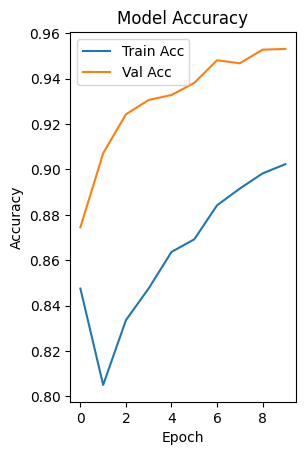

In [18]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

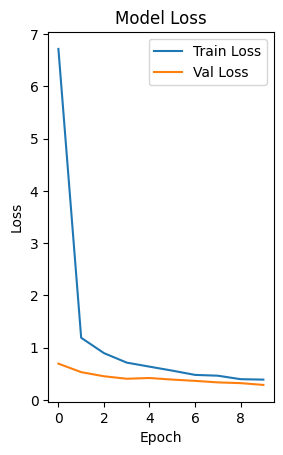

In [19]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [21]:
plt.tight_layout()
plt.show()
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


<Figure size 640x480 with 0 Axes>

Test Accuracy: 0.9434, Test Loss: 0.3146


In [ ]:
# probabilities
y_pred_proba = model.predict(X_test)           
y_pred_classes = np.argmax(y_pred_proba, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


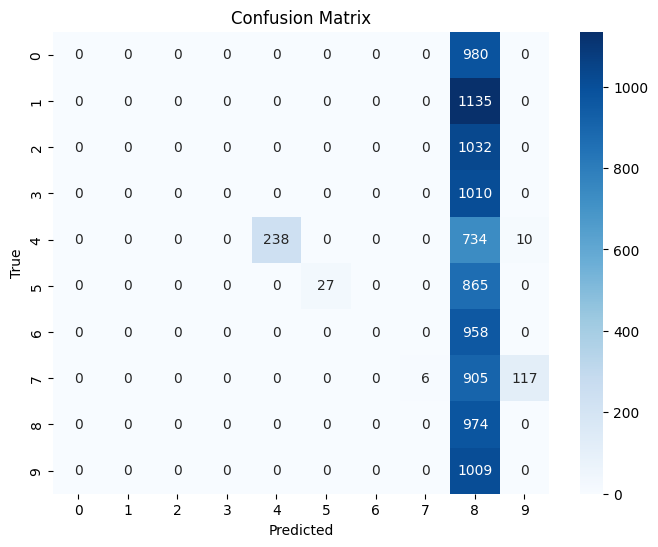

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, digits=4,zero_division=0))

Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       980
           1     0.0000    0.0000    0.0000      1135
           2     0.0000    0.0000    0.0000      1032
           3     0.0000    0.0000    0.0000      1010
           4     1.0000    0.2424    0.3902       982
           5     1.0000    0.0303    0.0588       892
           6     0.0000    0.0000    0.0000       958
           7     1.0000    0.0058    0.0116      1028
           8     0.1014    1.0000    0.1842       974
           9     0.0000    0.0000    0.0000      1009

    accuracy                         0.1245     10000
   macro avg     0.3101    0.1278    0.0645     10000
weighted avg     0.3001    0.1245    0.0627     10000



In [27]:
model.save("mnist_ann_model.keras")

In [30]:
model.export("mnist_ann_savedmodel")


INFO:tensorflow:Assets written to: mnist_ann_savedmodel\assets


INFO:tensorflow:Assets written to: mnist_ann_savedmodel\assets


Saved artifact at 'mnist_ann_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2549539398928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549539399696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549539396624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549539399312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549539401040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549539400272: TensorSpec(shape=(), dtype=tf.resource, name=None)


['Assignment.ipynb', 'insurancedataset.csv', 'mnist_ann_model.h5', 'mnist_ann_model.keras', 'mnist_ann_savedmodel']


In [32]:
reloaded = load_model("mnist_ann_model.h5")
score = reloaded.evaluate(X_test, y_test_cat, verbose=0)
print("Reloaded model test accuracy:", score[1])

Reloaded model test accuracy: 0.12449999898672104
